In [1]:
import pandas as pd
import hdbscan
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

/Users/kaushikdayalan/projects/storymachine_projects/porsche_topic_analysis/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-20 12:47:16.636138: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("./data/mercedes_instagram.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [3]:
df.head()

,postUrl,postContent,commentCount,likeCount,postTimestamp,type,viewCount,profileUrl,username,playCount
0,https://www.instagram.com/p/Cm7Se3INa39/,Vehicle of the Week: Mercedes-AMG GT R Coupe,6,201,2023-01-02 20:35:08+00:00,Video,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN
1,https://www.instagram.com/p/Cm7Se3INa39/,Vehicle of the Week: Mercedes-AMG GT R Coupe,6,201,2023-01-02 20:35:08+00:00,Video,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN
2,https://www.instagram.com/p/Cm7Se3INa39/,Vehicle of the Week: Mercedes-AMG GT R Coupe,6,201,2023-01-02 20:35:08+00:00,Video,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN
3,https://www.instagram.com/p/Cm9YSviIkto/,What’s your favorite driving season? 🌸☀️🍂❄️,15,166,2023-01-03 16:04:24+00:00,Photo,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN
4,https://www.instagram.com/p/Cm9YSviIkto/,What’s your favorite driving season? 🌸☀️🍂❄️,15,166,2023-01-03 16:04:24+00:00,Photo,NaN,https://www.instagram.com/usamgacademy,usamgacademy,NaN


In [44]:
representation_model = KeyBERTInspired()
model = BERTopic(representation_model=representation_model, nr_topics=7, n_gram_range=(1, 3))
topics, probs = model.fit_transform(df.postContent.values)

In [45]:
model.get_topic_info().Name.values

array(['-1_featured next month_our awesome photos_awesome photos of_awesome photos',
       '0_amg driving academy_driving academy so_driving academy_the amg driving',
       '1_featured next month_winning our photo_be featured next_be featured',
       '2_favorite which reaction_reaction is your_which reaction_which reaction is',
       '3_pit stop at_stop at racesonoma_make pit stop_pit stop',
       '4_fastest take trip_track with ashleyfreiberg_ashleyfreiberg which corner_racesonoma track',
       '5_photo dump_this photo dump_photo dump these_dump'], dtype=object)

In [46]:
model.get_topic_freq()

,Topic,Count
0,0,145
3,-1,62
2,1,48
1,2,18
5,3,14
4,4,12
6,5,11


In [47]:
x = model.get_document_info(df.postContent.values)
x

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Vehicle of the Week: Mercedes-AMG GT R Coupe,0,0_amg driving academy_driving academy so_drivi...,"[amg driving academy, driving academy so, driv...",[Fall into a new season with us at the AMG Dri...,amg driving academy - driving academy so - dri...,1.000000,False
1,Vehicle of the Week: Mercedes-AMG GT R Coupe,0,0_amg driving academy_driving academy so_drivi...,"[amg driving academy, driving academy so, driv...",[Fall into a new season with us at the AMG Dri...,amg driving academy - driving academy so - dri...,1.000000,False
2,Vehicle of the Week: Mercedes-AMG GT R Coupe,0,0_amg driving academy_driving academy so_drivi...,"[amg driving academy, driving academy so, driv...",[Fall into a new season with us at the AMG Dri...,amg driving academy - driving academy so - dri...,1.000000,False
3,What’s your favorite driving season? 🌸☀️🍂❄️,0,0_amg driving academy_driving academy so_drivi...,"[amg driving academy, driving academy so, driv...",[Fall into a new season with us at the AMG Dri...,amg driving academy - driving academy so - dri...,0.695864,False
4,What’s your favorite driving season? 🌸☀️🍂❄️,0,0_amg driving academy_driving academy so_drivi...,"[amg driving academy, driving academy so, driv...",[Fall into a new season with us at the AMG Dri...,amg driving academy - driving academy so - dri...,0.864135,False
...,...,...,...,...,...,...,...,...
305,We’ve had 25 events so far and we appreciate e...,1,1_featured next month_winning our photo_be fea...,"[featured next month, winning our photo, be fe...",[Congratulations to @she.3.2.1go for winning o...,featured next month - winning our photo - be f...,1.000000,False
306,We’ve had 25 events so far and we appreciate e...,1,1_featured next month_winning our photo_be fea...,"[featured next month, winning our photo, be fe...",[Congratulations to @she.3.2.1go for winning o...,featured next month - winning our photo - be f...,0.985144,False
307,We’ve had 25 events so far and we appreciate e...,1,1_featured next month_winning our photo_be fea...,"[featured next month, winning our photo, be fe...",[Congratulations to @she.3.2.1go for winning o...,featured next month - winning our photo - be f...,1.000000,False
308,We’ve had 25 events so far and we appreciate e...,1,1_featured next month_winning our photo_be fea...,"[featured next month, winning our photo, be fe...",[Congratulations to @she.3.2.1go for winning o...,featured next month - winning our photo - be f...,0.967343,False


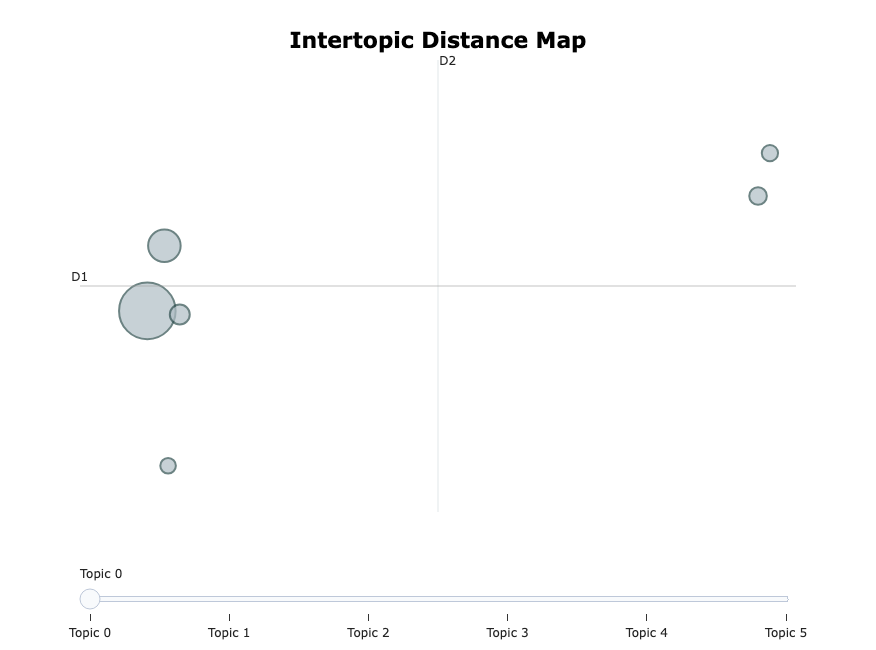

In [48]:
model.visualize_topics()

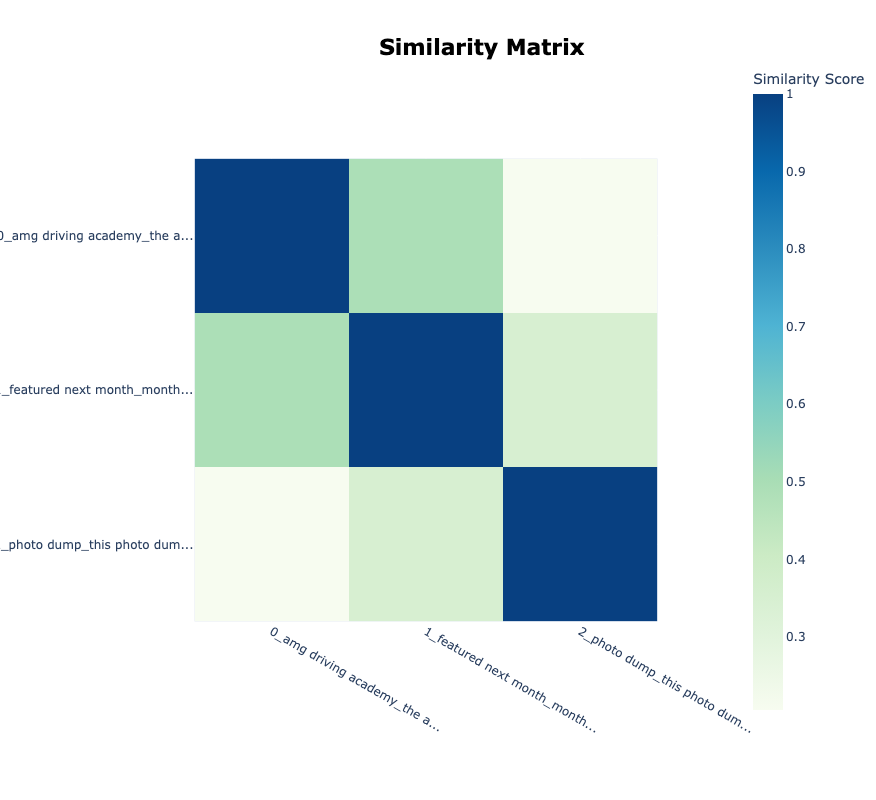

In [34]:
model.visualize_heatmap()